<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/Devito_0_SymPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 0 - Sympy basics to build for Devito


Author - Divyanshu Vyas ( PE | RE | Data Science | ML/AI)

Email - dvyas13ad@gmail.com

In [2]:
!pip install devito

     |████████████████████████████████| 378kB 2.9MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 655kB 11.7MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 194kB 11.6MB/s 
     |████████████████████████████████| 153kB 16.1MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
  Created wheel for codepy: filename=codepy-2019.1-cp36-none-any.whl size=19313 sha256=da5ef751c7380658b6012fbc3831f05b68c5a509ed8ab0f81504844bc27ee390
  Stored in directory: /root/.cache/pip/wheels/f4/53/e7/b53cf7ba45381b676bbd5eaaedc19ae82e1c397e9c1766ddf4
  Created wheel for cgen: filename=cgen-2020.1-cp36-none-any.whl size=15825 sha256=e1a1c7f6ef4a7763fa8b8cae0c57310b93eeb9617f5b285e47b66e5

In [3]:
import numpy as np
import devito
from devito import Grid, Function, Eq, Operator
grid = Grid(shape=(21,), extent=(1.0,), origin=(0.0,), dtype=np.float32)
x = grid.dimensions[0]
f = Function(name='f', grid=grid, space_order=8)
g = Function(name='g', grid=grid, space_order=8)
eq_dfdx = Eq(g, getattr(f, 'dx')(x+0.5*x.spacing))
op = Operator(eq_dfdx)
print(op)

#define _POSIX_C_SOURCE 200809L
#include "stdlib.h"
#include "math.h"
#include "sys/time.h"
#include "xmmintrin.h"
#include "pmmintrin.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
} ;


int Kernel(struct dataobj *restrict f_vec, struct dataobj *restrict g_vec, const float h_x, struct profiler * timers, const int x_M, const int x_m)
{
  /* Flush denormal numbers to zero in hardware */
  _MM_SET_DENORMALS_ZERO_MODE(_MM_DENORMALS_ZERO_ON);
  _MM_SET_FLUSH_ZERO_MODE(_MM_FLUSH_ZERO_ON);
  struct timeval start_section0, end_section0;
  gettimeofday(&start_section0, NULL);
  /* Begin section0 */
  for (int x = x_m; x <= x_M; x += 1)
  {
    g[x + 8] = 1.0F + (6.97544643e-4F*(f[x + 5] - f[x + 12]) + 9.5703125e-3F*(-f[x + 6] + f[x + 11]) + 7.97526042e-2F*(f[x + 7] - f[x + 10]) + 1.1962890625F*(-f[x + 8] + f[x + 9]))/h_x;
  }
  /* End section0 */
  gettimeofday(&end_se

In [4]:
import numpy as np
from sympy import *
from devito import *

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
grd = Grid(shape=(4,4),extent=(4,4))

#Let's Brush up a bit of SymPy first. 

In [11]:
import math

init_printing(pretty_print=True)


In [12]:
print(math.sqrt(8))

print(sqrt(8))

2.8284271247461903
2*sqrt(2)


In [13]:
sqrt(8)

In [14]:
x , y = symbols('x y')

In [16]:
expr = x**2 + 2*x + 1

In [17]:
expr

In [18]:
expr + y**2

In [19]:
expr+1

In [20]:
expr - x

In [21]:
x*expr

In [22]:
expand(x*expr)

In [25]:
eq = Eq(x**2 - 4 , 0)

eq

In [26]:
solveset(eq)

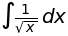

In [28]:
Integral(1/sqrt(x) , x)

In [29]:
init_printing(use_latex='mathjax')

In [34]:
Integral(1/sqrt(x) , x)

⌠      
⎮ 1    
⎮ ── dx
⎮ √x   
⌡      

$ \int \sqrt{\frac{1}{x}}\, dx $

In [35]:
str_expr = "x**2 + 3*x - 1/2"

exp2 = simplify(str_expr)

In [36]:
exp2

 2         1
x  + 3⋅x - ─
           2

In [38]:
#substituting x = 2 in a expression and finding f(2)

exp2.subs(x,0)

-1/2

In [40]:
exp3 = 2*sqrt(2)

exp3.evalf()

2.82842712474619

In [41]:
pi.evalf(40)

3.141592653589793238462643383279502884197

In [42]:
cos(2*x).subs(x,pi)

1

In [46]:
f , g = symbols('f g')

In [47]:
f(x)

f(x)

In [48]:
f(x).diff()

d       
──(f(x))
dx      

In [49]:
f(x).diff().diff()

  2      
 d       
───(f(x))
  2      
dx       

#SOlving an ODE

In [50]:
diffeq = Eq(f(x) - 2*f(x).diff(x) + f(x).diff(x,x) , sin(x))

In [51]:
diffeq

                      2               
         d           d                
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                

In [52]:
dsolve(diffeq)

                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   

#Finite Differences

In [58]:
dfdx = f(x).diff(x)

h = symbols('h')

In [59]:
dfdx.as_finite_difference(h)

   ⎛  h    ⎞    ⎛h    ⎞
  f⎜- ─ + x⎟   f⎜─ + x⎟
   ⎝  2    ⎠    ⎝2    ⎠
- ────────── + ────────
      h           h    

In [60]:
dfdx_2 = f(x).diff(x,x)

dfdx_2.as_finite_difference(h)

  2⋅f(x)   f(-h + x)   f(h + x)
- ────── + ───────── + ────────
     2          2          2   
    h          h          h    

In [61]:
#Devito is an enhanced version of SymPy's Finite Differences Method. 